/tmp/ipykernel_46126/2550097933.py:20: UserWarning: The following kwargs were not used by contour: 'color'
  CS = plt.contour(X1, X2, F1, 10*levels, color='black', alpha=0.5)


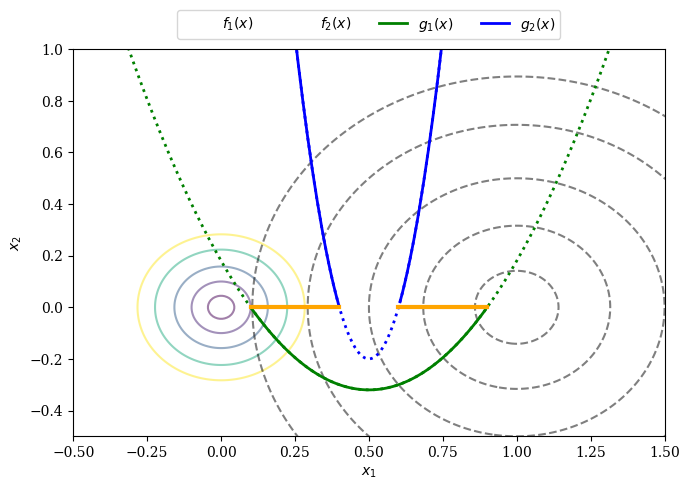

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='serif')

# 定义两个自变量 x1 与 x2，分别在[-2, 2]区间内等间距抽取500个点
X1, X2 = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))

# 目标函数 f1 与 f2 的定义
F1 = 100 * (X1**2 + X2**2)
F2 = (X1 - 1)**2 + X2**2

# 约束定义
G1 = 2 * (X1[0] - 0.1) * (X1[0] - 0.9)
G2 = 20 * (X1[0] - 0.4) * (X1[0] - 0.6)

levels = np.array([0.02, 0.1, 0.25, 0.5, 0.8])
plt.figure(figsize=(7, 5))

# 绘制 f1 的等高图
CS = plt.contour(X1, X2, F1, 10*levels, color='black', alpha=0.5)
CS.collections[0].set_label("$f_1(x)$")

# 绘制 f2 的等高图
CS = plt.contour(X1, X2, F2, levels, linestyles="dashed", colors='black', alpha=0.5)
CS.collections[0].set_label("$f_2(x)$")

# 绘制约束 g1，以绿色线条显示，并将满足Pareto最优集合以实线显示，其余用虚线显示
plt.plot(X1[0], G1, linewidth=2.0, color="green", linestyle='dotted')
plt.plot(X1[0][G1<0], G1[G1<0], label="$g_1(x)$", linewidth=2.0, color="green")

# 绘制约束 g2，以蓝色线条显示，并将满足Pareto最优集合以实线显示，其余用虚线显示
plt.plot(X1[0], G2, linewidth=2.0, color="blue", linestyle='dotted')
plt.plot(X1[0][X1[0]>0.6], G2[X1[0]>0.6], label="$g_2(x)$", linewidth=2.0, color="blue")
plt.plot(X1[0][X1[0]<0.4], G2[X1[0]<0.4], linewidth=2.0, color="blue")

# 绘制求解的最优化问题的Pareto前沿，以橘黄色显示
plt.plot(np.linspace(0.1, 0.4, 100), np.zeros(100), linewidth=3.0, color="orange")
plt.plot(np.linspace(0.6, 0.9, 100), np.zeros(100), linewidth=3.0, color="orange")

# 设置x、y轴的显示范围及其坐标名称
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# 显示图例
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=4, fancybox=True, shadow=False)

plt.tight_layout()

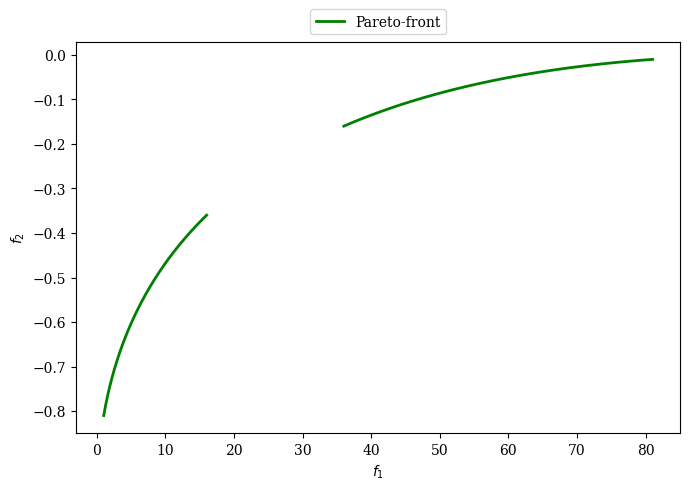

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

# 目标空间的函数关系，以第一个目标 f1 为自变量，第二个目标 f2 为因变量
f2 = lambda f1: -((f1/100) ** 0.5 - 1)**2
# 在目标空间上绘制Pareto前沿
F1_a, F1_b = np.linspace(1, 16, 300), np.linspace(36, 81, 3000)
F2_a, F2_b = f2(F1_a), f2(F1_b)

# 绘制结果
plt.rc('font', family='serif')
plt.plot(F1_a, F2_a, linewidth=2.0, color="green", label="Pareto-front")
plt.plot(F1_b, F2_b, linewidth=2.0, color="green")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10), ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

In [26]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

class MyProblem(ElementwiseProblem):

		def __init__(self):
				super().__init__(
						n_var=2,
						n_obj=2,
						n_ieq_constr=2,
						xl=np.array([-2, -2]),
						xu=np.array([2, 2])
				)

		def _evaluate(self, x, out, *args, **kwargs):
				f1 = 100 * (x[0]**2 + x[1]**2)
				f2 = (x[0]-1)**2 + x[1]**2

				g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
				g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

				out["F"] = [f1, f2]
				out["G"] = [g1, g2]

problem = MyProblem()

In [27]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling

algorithm = NSGA2(
		pop_size=40,
		n_offsprings=10,
		sampling=FloatRandomSampling(),
		crossover=SBX(prob=0.9, eta=15),
		mutation=PM(eta=20),
		eliminate_duplicates=True
)

In [29]:
from pymoo.termination import get_termination

termination = get_termination("n_gen", 40)

In [33]:
from pymoo.optimize import minimize

res = minimize(
		problem,
		algorithm,
        termination,
		save_hastory=True,
		verbose=True        # 现实每步迭代结果
)

X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       40 |      1 |  0.000000E+00 |  1.381897E+01 |             - |             -
     2 |       50 |      1 |  0.000000E+00 |  5.5728118304 |  0.000000E+00 |             f
     3 |       60 |      2 |  0.000000E+00 |  2.3566335586 |  1.0000000000 |         ideal
     4 |       70 |      2 |  0.000000E+00 |  0.9303106251 |  0.000000E+00 |             f
     5 |       80 |      3 |  0.000000E+00 |  0.1855741921 |  0.0190718898 |             f
     6 |       90 |      3 |  0.000000E+00 |  0.0101043191 |  0.000000E+00 |             f
     7 |      100 |      4 |  0.000000E+00 |  0.0040751142 |  0.0605159509 |         ideal
     8 |      110 |      5 |  0.000000E+00 |  0.0008238151 |  0.0182642985 |         ideal
     9 |      120 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0070124647 |         ideal
    10 |      130 |      7 |  0.000000E+00 |  0.000000E+00 |  0.0396380977 |         ideal

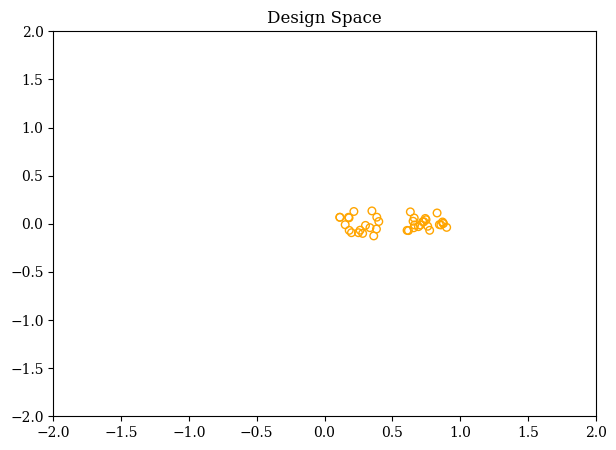

In [38]:
import matplotlib.pyplot as plt

# 获得自变量而区间
xl, xu = problem.bounds()

# 绘制结果
plt.figure(figsize=(7, 5))
# 绘制最优解集的散点图
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors="none", edgecolors="orange")
# 设置x、y周现实区间
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()

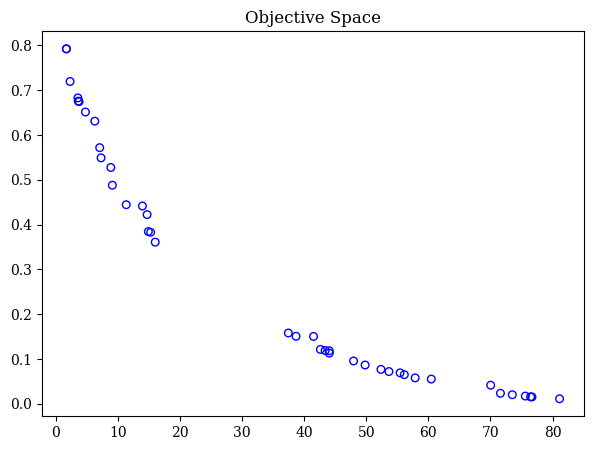

In [39]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()